Tutorial 3: Realism and Complexity
==================================

Up to now, we've fitted some fairly crude and unrealistic lens models. For example, we've modeled the lens galaxy's
mass as a sphere. Given most lens galaxies are 'elliptical's we should probably model their mass as elliptical! We've
also omitted the lens galaxy's light, which typically outshines the source galaxy.

In this example, we'll start using a more realistic lens model.

In my experience, the simplest lens model (e.g. that has the fewest parameters) that provides a good fit to real
strong lenses is as follows:

    1) An _EllipticalSersic _LightProfile_ for the lens galaxy's light.
    2) A _EllipticalIsothermal_ (SIE) _MassProfile_ for the lens galaxy's mass.
    3) An _EllipticalExponential_ _LightProfile_ for the source-galaxy's light (to be honest, this is too simple,
        but lets worry about that later).

This has a total of 18 non-linear parameters, which is over double the number of parameters we've fitted up to now.
In future exercises, we'll fit even more complex models, with some 20-30+ non-linear parameters.

In [1]:
%matplotlib inline

from autoconf import conf
import autolens as al
import autolens.plot as aplt
import autofit as af
from pyprojroot import here

workspace_path = str(here())
print("Workspace Path: ", workspace_path)

conf.instance = conf.Config(
    config_path=f"{workspace_path}/howtolens/config",
    output_path=f"{workspace_path}/howtolens/output",
)



Workspace Path:  /home/carlos/autolens_workspace


We’ll use new strong lensing data, where:

    The lens galaxy’s LightProfile is an EllipticalSersic.
    The lens galaxy’s MassProfile is an EllipticalIsothermal.
    The source galaxy’s LightProfile is an EllipticalExponential.


In [2]:
from howtolens.simulators.chapter_2 import (
    lens_sersic_sie__source_exp,
)

dataset_type = "chapter_2"
dataset_name = "lens_sersic_sie__source_exp"
dataset_path = f"{workspace_path}/howtolens/dataset/{dataset_type}/{dataset_name}"

imaging = al.Imaging.from_fits(
    image_path=f"{dataset_path}/image.fits",
    noise_map_path=f"{dataset_path}/noise_map.fits",
    psf_path=f"{dataset_path}/psf.fits",
    pixel_scales=0.1,
)

We’ll create and use a 2.5” Mask.

In [3]:
mask = al.Mask.circular(
    shape_2d=imaging.shape_2d, pixel_scales=imaging.pixel_scales, radius=2.5
)

When plotted, the lens light’s is clearly visible in the centre of the image.

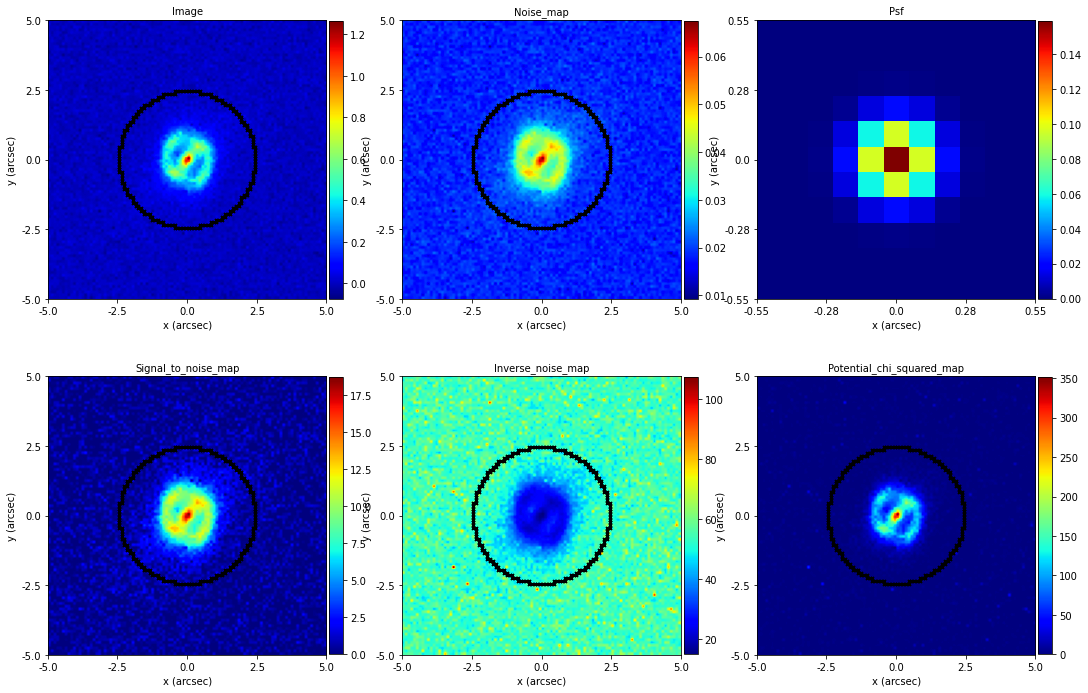

In [4]:
aplt.Imaging.subplot_imaging(imaging=imaging, mask=mask)

Like in the previous tutorial, we use a_PhaseSettingsImaging_ object to specify our model-fitting procedure uses a regular Grid.

In [5]:
settings = al.PhaseSettingsImaging(grid_class=al.Grid, sub_size=2)

Now lets fit the dataset using a phase.

In [6]:
phase = al.PhaseImaging(
    phase_name="phase_t3_realism_and_complexity",
    settings=settings,
    galaxies=dict(
        lens_galaxy=al.GalaxyModel(
            redshift=0.5, light=al.lp.EllipticalSersic, mass=al.mp.EllipticalIsothermal
        ),
        source_galaxy=al.GalaxyModel(redshift=1.0, light=al.lp.EllipticalExponential),
    ),
    search=af.DynestyStatic(n_live_points=80),
)

Lets run the phase.

In [8]:
print(
    "Dynesty has begun running - checkout the autolens_workspace/output/3_realism_and_complexity"
    "folder for live output of the results, images and lens model."
    "This Jupyter notebook cell with progress once Dynesty has completed - this could take some time!"
)

result =  phase.run(dataset=imaging, mask=mask)

print("Dynesty has finished run - you may now continue the notebook.")

Dynesty has begun running - checkout the autolens_workspace/output/3_realism_and_complexityfolder for live output of the results, images and lens model.This Jupyter notebook cell with progress once Dynesty has completed - this could take some time!


INFO:root:Generating initial samples of model, which are subject to prior limits and other constraints.
/home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/dynesty.py:373: UserWarning: A note of caution: having `nlive < ndim * (ndim + 1) // 2` may result in unconstrained bounding distributions.
  warnings.warn("A note of caution: "
INFO:root:No Dynesty samples found, beginning new non-linear search. 
296it [00:56,  5.26it/s, +80 | bound: 0 | nc: 1 | ncall: 2610 | eff(%): 14.406 | loglstar:   -inf < -3843.478 <    inf | logz: -3852.243 +/-    nan | dlogz:  1.099 >  0.089]  
INFO:root:2500 Iterations: Performing update (Visualization, outputting samples, etc.).
297it [00:00, 379.48it/s, bound: 0 | nc: 36 | ncall: 2646 | eff(%): 11.224 | loglstar:   -inf < -12179.881 <    inf | logz: -12187.952 +/-    nan | dlogz: 8406.799 >  0.089]/home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. A

/home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
740it [00:18,  8.52it/s, bound: 49 | nc: 5 | ncall: 5917 | eff(%): 12.506 | loglstar:   -inf < -3555.231 <    inf | logz: -3568.891 +/-    nan | dlogz: 1413.040 >  0.089]   /home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
753it [00:21,  4.73it/s, bound: 51 | nc: 14 | ncall: 6049 | eff(%): 12.448 | loglstar:   -inf < -3451.812 <    inf | logz: -3466.073 +/-    nan | dlogz: 1311.030 >  0.089]/home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusti

1600it [00:58, 27.31it/s, +80 | bound: 151 | nc: 1 | ncall: 12765 | eff(%): 13.161 | loglstar:   -inf < 134.551 <    inf | logz: 109.587 +/-    nan | dlogz:  1.099 >  0.089] 
INFO:root:12500 Iterations: Performing update (Visualization, outputting samples, etc.).
1601it [00:00, 11099.40it/s, bound: 151 | nc: 6 | ncall: 12771 | eff(%): 12.536 | loglstar:   -inf < -992.135 <    inf | logz: -1016.338 +/-    nan | dlogz: 1133.740 >  0.089]/home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/samp

2195it [00:46,  6.46it/s, bound: 225 | nc: 5 | ncall: 17172 | eff(%): 12.782 | loglstar:   -inf < 1654.882 <    inf | logz: 1623.704 +/-    nan | dlogz: 472.405 >  0.089] /home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
2205it [00:49,  3.18it/s, bound: 227 | nc: 11 | ncall: 17286 | eff(%): 12.756 | loglstar:   -inf < 1698.727 <    inf | logz: 1667.479 +/-    nan | dlogz: 428.747 >  0.089]/home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
2213it [00:51,  5.83it/s, bound: 228 | nc: 5 | ncall: 17346 | eff(%): 12.758 | loglstar:   -inf < 1721.743 <    inf | logz: 1689.422 +/-    nan | dlogz: 407.705

2893it [00:42,  6.34it/s, bound: 307 | nc: 7 | ncall: 22026 | eff(%): 13.134 | loglstar:   -inf < 2339.173 <    inf | logz: 2300.223 +/-    nan | dlogz: 42.628 >  0.089] /home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
2931it [00:50,  3.27it/s, bound: 311 | nc: 27 | ncall: 22336 | eff(%): 13.122 | loglstar:   -inf < 2350.236 <    inf | logz: 2310.670 +/-    nan | dlogz: 31.819 >  0.089]/home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
2956it [00:54,  6.31it/s, bound: 314 | nc: 6 | ncall: 22515 | eff(%): 13.129 | loglstar:   -inf < 2352.930 <    inf | logz: 2313.998 +/-    nan | dlogz: 30.062 > 

3709it [01:02, 59.50it/s, +80 | bound: 420 | nc: 1 | ncall: 30452 | eff(%): 12.443 | loglstar:   -inf < 2457.472 <    inf | logz: 2406.888 +/-    nan | dlogz:  0.752 >  0.089]
INFO:root:30000 Iterations: Performing update (Visualization, outputting samples, etc.).
3931it [00:59, 65.79it/s, +80 | bound: 456 | nc: 1 | ncall: 32954 | eff(%): 12.172 | loglstar:   -inf < 2522.822 <    inf | logz: 2469.178 +/-    nan | dlogz:  0.923 >  0.089]
INFO:root:32500 Iterations: Performing update (Visualization, outputting samples, etc.).
4114it [00:59, 69.06it/s, +80 | bound: 485 | nc: 1 | ncall: 35456 | eff(%): 11.829 | loglstar:   -inf < 2581.589 <    inf | logz: 2525.395 +/-    nan | dlogz:  1.099 >  0.089]
INFO:root:35000 Iterations: Performing update (Visualization, outputting samples, etc.).
4291it [01:03, 68.10it/s, +80 | bound: 514 | nc: 1 | ncall: 37958 | eff(%): 11.515 | loglstar:   -inf < 2664.564 <    inf | logz: 2606.171 +/-    nan | dlogz:  1.099 >  0.089]
INFO:root:37500 Iterations: P

10491it [00:20, 502.82it/s, +80 | bound: 1408 | nc: 1 | ncall: 99209 | eff(%): 10.655 | loglstar:   -inf < 4615.096 <    inf | logz: 4487.192 +/-    nan | dlogz:  0.001 >  0.089]
INFO:root:100000 Iterations: Performing update (Visualization, outputting samples, etc.).
10491it [00:00, 2406740.87it/s, +80 | bound: 1408 | nc: 1 | ncall: 99209 | eff(%): 10.655 | loglstar:   -inf < 4615.096 <    inf | logz: 4487.192 +/-    nan | dlogz:  0.001 >  0.089]
INFO:root:102500 Iterations: Performing update (Visualization, outputting samples, etc.).
INFO:root:105000 Iterations: Performing update (Visualization, outputting samples, etc.).


Dynesty has finished run - you may now continue the notebook.


And lets look at the fit to the Imaging data, which as we are used to fits the data brilliantly!

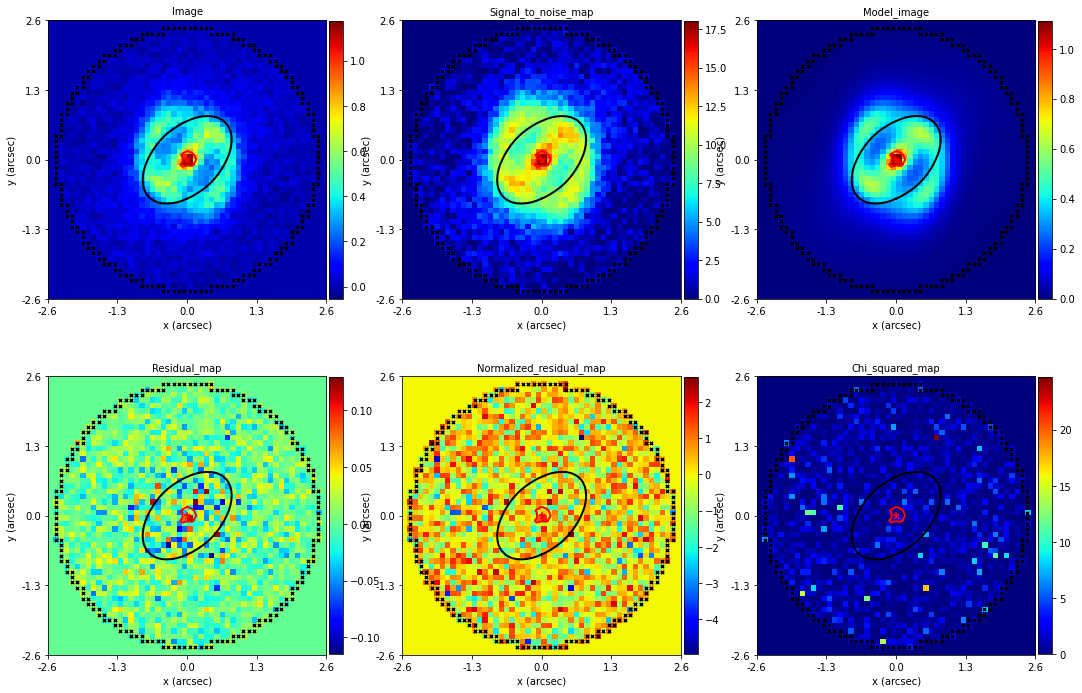

In [9]:
aplt.FitImaging.subplot_fit_imaging(fit=result.max_log_likelihood_fit)

Up to now, all of our non-linear searches have been successes. They find a lens model that provides a visibly good fit to the data, minimizing the residuals and inferring a high log likelihood value.

These solutions are called ‘global’ maxima, they correspond to the highest likelihood regions of the entirity of parameter space. There are no other lens models in parameter space that would give higher likelihoods - this is the model we wants to always infer!

However, non-linear searches may not always successfully locate the global maxima lens models. They may instead infer a ‘local maxima’, a solution which has a high log likelihood value relative to the lens models near it in parameter space, but whose log likelihood is significantly below the ‘global’ maxima solution somewhere else in parameter space.

Inferring such solutions is essentially a failure of our non-linear search and it is something we do not want to happen! Lets infer a local maxima, by reducing the number of ‘live points’ Dynesty uses to map out parameter space. We’re going to use so few that it has no hope of locating the global maxima, ultimating finding and inferring a local maxima instead.

In [10]:
phase = al.PhaseImaging(
    phase_name="phase_t3_realism_and_complexity__local_maxima",
    settings=settings,
    galaxies=dict(
        lens_galaxy=al.GalaxyModel(
            redshift=0.5, light=al.lp.EllipticalSersic, mass=al.mp.EllipticalIsothermal
        ),
        source_galaxy=al.GalaxyModel(redshift=1.0, light=al.lp.EllipticalExponential),
    ),
    search=af.DynestyStatic(n_live_points=5),
)

print(
    "Dynesty has begun running - checkout the autolens_workspace/output/3_realism_and_complexity"
    "folder for live output of the results, images and lens model."
    "This Jupyter notebook cell with progress once Dynesty has completed - this could take some time!"
)

result_local_maxima = phase.run(dataset=imaging, mask=mask)

print("Dynesty has finished run - you may now continue the notebook.")

Dynesty has begun running - checkout the autolens_workspace/output/3_realism_and_complexityfolder for live output of the results, images and lens model.This Jupyter notebook cell with progress once Dynesty has completed - this could take some time!


INFO:root:Generating initial samples of model, which are subject to prior limits and other constraints.
/home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/dynesty.py:371: UserWarning: Beware! Having `nlive <= 2 * ndim` is extremely risky!
  warnings.warn("Beware! Having `nlive <= 2 * ndim` is extremely risky!")
INFO:root:No Dynesty samples found, beginning new non-linear search. 
21it [00:04,  2.10it/s, bound: 0 | nc: 29 | ncall: 215 | eff(%):  9.767 | loglstar:   -inf < -12710.188 <    inf | logz: -12716.319 +/-    nan | dlogz: 4535.084 >  0.014] /home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
22it [00:05,  1.67it/s, bound: 1 | nc: 5 | ncall: 220 | eff(%): 10.000 | loglstar:   -inf < -12124.109 <    inf | logz: -12130.422 +/-    nan | dlogz: 3867.396 >  0.014] /home/carlos/anacon

1347it [00:32,  3.18s/it, bound: 1326 | nc: 346 | ncall: 19337 | eff(%):  6.966 | loglstar:   -inf < 2388.603 <    inf | logz: 2143.431 +/-    nan | dlogz:  2.709 >  0.014]/home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
1351it [00:45,  2.56s/it, bound: 1330 | nc: 67 | ncall: 19903 | eff(%):  6.788 | loglstar:   -inf < 2389.831 <    inf | logz: 2143.863 +/-    nan | dlogz:  1.683 >  0.014] /home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
1353it [00:55,  3.73s/it, bound: 1332 | nc: 125 | ncall: 20379 | eff(%):  6.639 | loglstar:   -inf < 2390.611 <    inf | logz: 2144.132 +/-    nan | dlogz:  1.235 >  0.014]/h

Dynesty has finished run - you may now continue the notebook.


And lets look at the fit to the Imaging data, which is clearly worse than our original fit above.

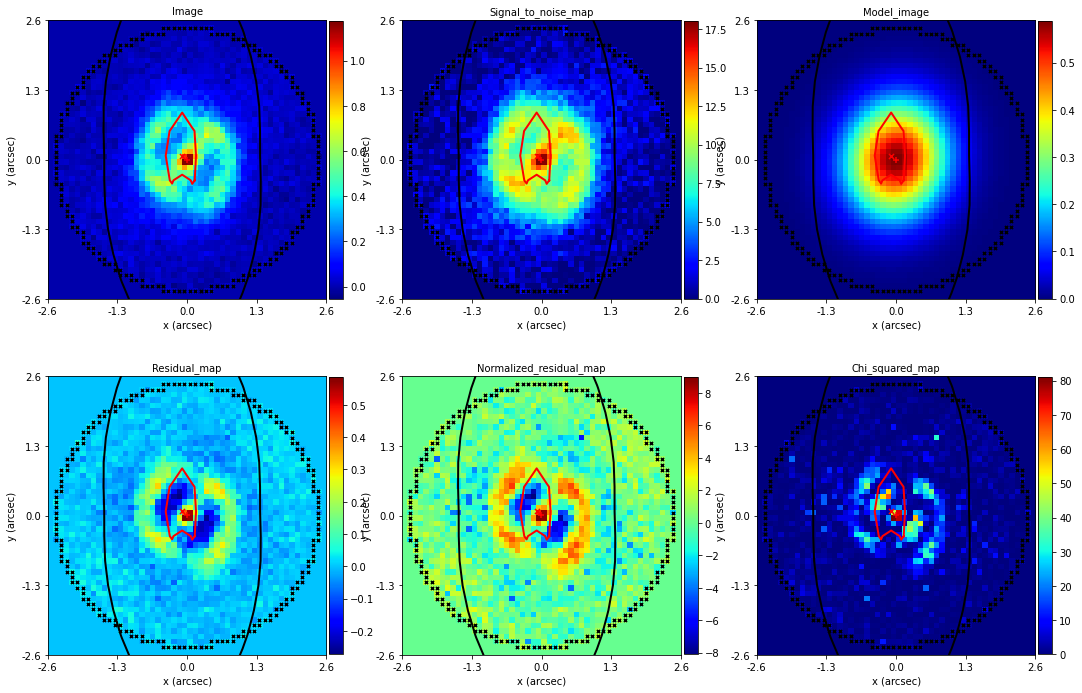

In [11]:
aplt.FitImaging.subplot_fit_imaging(fit=result_local_maxima.max_log_likelihood_fit)

Finally, just to be sure we hit a local maxima, lets compare the maximum log likelihood values of the two results

The local maxima value is significantly lower, confirming that our non-linear search simply failed to locate lens models which fit the data better when it searched parameter space.

In [13]:
print("Likelihood of Global Model:")
print(result.max_log_likelihood_fit.log_likelihood)
print("Likelihood of Local Model:")
print(result_local_maxima.max_log_likelihood_fit.log_likelihood)

Likelihood of Global Model:
4615.096128255619
Likelihood of Local Model:
2392.6578296783737


In this example, we intentionally made our non-linear search fail, by using so few live points it had no hope of sampling parameter space thoroughly. For modeling real lenses we wouldn’t do this on purpose, but the risk of inferring a local maxima is still very real, especially as we make our lens model more complex.

Lets think about ‘complexity’. As we make our lens model more realistic, we also made it more complex. For this tutorial, our non-linear parameter space went from 7 dimensions to 18. This means there was a much larger ‘volume’ of parameter space to search. As this volume grows, there becomes a higher chance that our non-linear search gets lost and infers a local maxima, especially if we don’t set it up with enough live points!

At its core, lens modeling is all about learning how to get a non-linear search to find the global maxima region of parameter space, even when the lens model is extremely complex.

And with that, we’re done. In the next exercise, we’ll learn how to deal with failure and begin thinking about how we can ensure our non-linear search finds the global-maximum log likelihood solution.